In [ ]:
import pathlib
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pic_path=pathlib.Path('/content/drive/MyDrive/datasett')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import tensorflow as tf
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam

In [ ]:
anger_list=list(pic_path.glob('Angry/*'))
happy_list=list(pic_path.glob('Happy/*'))
neutral_list=list(pic_path.glob('Neutral/*'))
sad_list=list(pic_path.glob('Sad/*'))
surprise_list=list(pic_path.glob('Surprise/*'))

In [ ]:
len(anger_list),len(happy_list),len(neutral_list),len(sad_list),len(surprise_list)

(1861, 4312, 2920, 3934, 1813)

In [ ]:
pic_dict={'Angry':anger_list,'Happy':happy_list,
          'Neutral':neutral_list,'Sad':sad_list,'Surprise':surprise_list}

In [ ]:
pic_class={'Angry':0,'Happy':1,'Neutral':2,'Sad':3,'Surprise':4}

In [ ]:
from concurrent.futures import ThreadPoolExecutor
from PIL import Image
import numpy as np

def process_image(j, label):
    try:
        img = Image.open(j).convert('RGB')
        img = img.resize((100, 100))
        img = np.asarray(img, dtype=np.float32) / 255.0
        return img, label
    except:
        return None

x = []
y = []

with ThreadPoolExecutor() as executor:
    futures = []
    for i in pic_dict:
        for j in pic_dict[i]:
            futures.append(executor.submit(process_image, j, pic_class[i]))

    for future in futures:
        result = future.result()
        if result:
            img, label = result
            x.append(img)
            y.append(label)


In [ ]:
import numpy as np
x=np.array(x)
y=np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=.8,random_state=1)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D

model=Sequential()
model.add(Conv2D(filters=50,kernel_size=(3,3),input_shape=(100,100,3),activation='relu',strides=1,padding='valid'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=100,kernel_size=(3,3),activation='relu',strides=1,padding='valid'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
# Change the number of neurons in the final Dense layer to 5 to match the 5 emotion classes.
model.add(Dense(5,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 50)     │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 50)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 100)    │        45,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 100)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 52900)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     5,290,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,337,105 (20.36 MB)

 Trainable params: 5,337,105 (20.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
hist=model.fit(xtrain,ytrain,batch_size=500,epochs=25,validation_data=(xtest,ytest))

Epoch 1/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 382s 16s/step - accuracy: 0.2444 - loss: 2.1683 - val_accuracy: 0.2951 - val_loss: 1.5414
Epoch 2/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 381s 16s/step - accuracy: 0.3008 - loss: 1.5325 - val_accuracy: 0.3511 - val_loss: 1.4666
Epoch 3/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 390s 16s/step - accuracy: 0.3721 - loss: 1.4245 - val_accuracy: 0.4434 - val_loss: 1.2756
Epoch 4/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 376s 16s/step - accuracy: 0.4896 - loss: 1.2276 - val_accuracy: 0.5273 - val_loss: 1.1485
Epoch 5/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 380s 16s/step - accuracy: 0.5335 - loss: 1.1301 - val_accuracy: 0.5526 - val_loss: 1.0861
Epoch 6/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 376s 16s/step - accuracy: 0.5673 - loss: 1.0566 - val_accuracy: 0.5546 - val_loss: 1.0791
Epoch 7/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 383s 16s/step - accuracy: 0.5718 - loss: 1.0636 - val_accuracy: 0.5670 - val_loss: 1.0428
Epoch 8/25
24/24 ━━━━━━━━━━━━━━━━━━━━ 382s 16s/step - accuracy: 0.6083 - loss: 0.9740 - val_accuracy: 0.

In [ ]:
model.save("emotion.h5")

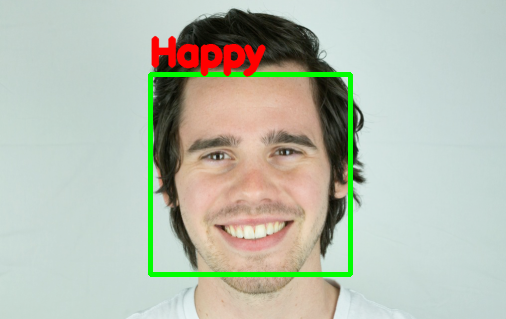

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow

# Load trained model
model = tf.keras.models.load_model('emo.h5')

# Correct label mapping: create a dictionary where keys are integers and values are emotion strings
labels = {0: 'Angry', 1: 'Happy', 2: 'Neutral', 3: 'Sad', 4: 'Surprise'}

# Load Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

def detect_faces(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        face = frame[y:y+h, x:x+w]
        face_rgb = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
        face_resized = cv2.resize(face_rgb, (100, 100))
        face_normalized = face_resized / 255.0
        face_input = np.expand_dims(face_normalized, axis=0)

        pred = model.predict(face_input, verbose=0)
        # Use the integer prediction as the key to get the emotion string
        predicted_class = np.argmax(pred)
        label = labels[predicted_class]

        # Draw rectangle and label
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 4)
        cv2.putText(frame, label, (x,y- 10), cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=1.2, color=(0, 0, 255), thickness=5, lineType=cv2.LINE_AA)

    return frame

# Load test image
image_path ='/content/Happiness-1-506x319.png'
frame = cv2.imread(image_path)

if frame is None:
    print("Error: Unable to load image.")
else:
    output_image = detect_faces(frame)
    cv2_imshow(output_image)